# Dimensionality Reduction  in HSI

### code below shows how dimensions are reduced 

#### Imported required libraries for the dataset

In [45]:
import numpy as np # linear algebra
import pandas as pd

####  The HSI dataset we have taken is the "Indian Pines " , the dataset is .npy file gathered from KAGGLE


In [51]:
sal_pines = np.load('salinas_corrected.npy') # training Dataset wd input values
ground_truth = np.load('salinas_gt.npy') # Dataset with output column

#### For processing the hyper spectral image data we are using  python  module  "Spectral" 

In [47]:
!pip install spectral

#### Importing the spectral module

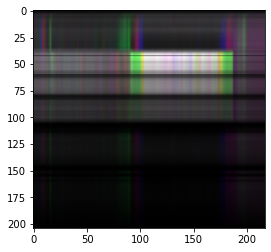

In [91]:
import spectral as sp
view = sp.imshow(sal_pines, (204, 217, 200))

#### "Shape"  is used to show no of elements per axis(Dimensions)

In [53]:
sal_pines.shape

(204, 217, 512)

In [6]:
indian_pines

array([[[290, 379, 369, ..., 379, 314, 371],
        [290, 308, 298, ..., 308, 314, 299],
        [290, 379, 298, ..., 379, 385, 299],
        ...,
        [373, 376, 447, ..., 367, 367, 447],
        [373, 376, 305, ..., 367, 367, 447],
        [305, 305, 447, ..., 438, 376, 376]],

       [[381, 400, 495, ..., 383, 479, 400],
        [381, 400, 411, ..., 383, 396, 483],
        [381, 483, 411, ..., 383, 396, 400],
        ...,
        [482, 477, 468, ..., 387, 387, 405],
        [482, 477, 468, ..., 470, 470, 405],
        [393, 393, 384, ..., 470, 489, 489]],

       [[585, 600, 604, ..., 540, 604, 605],
        [519, 535, 604, ..., 540, 539, 605],
        [585, 535, 670, ..., 540, 539, 540],
        ...,
        [594, 590, 664, ..., 661, 661, 674],
        [659, 590, 664, ..., 661, 661, 674],
        [655, 655, 664, ..., 596, 674, 674]],

       ...,

       [[ 36,  32,  29, ...,   6,   8,   1],
        [ 36,  28,  23, ...,   8,   4,  11],
        [ 30,  26,  27, ...,   4,   2,  11

#### Image display

ImageView object:
  Display bands       :  (145, 145, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [-2.0, 4127.0]
    G: [-2.0, 4127.0]
    B: [-7.0, 7603.0]

ImageView object:
  Display bands       :  (145, 145, 1)
  Interpolation       :  <default>
  RGB data limits     :
    R: [-2.0, 4127.0]
    G: [-2.0, 4127.0]
    B: [-7.0, 7609.0]

ImageView object:
  Display bands       :  (145, 145, 2)
  Interpolation       :  <default>
  RGB data limits     :
    R: [-2.0, 4127.0]
    G: [-2.0, 4127.0]
    B: [-5.0, 7590.0]

ImageView object:
  Display bands       :  (145, 145, 3)
  Interpolation       :  <default>
  RGB data limits     :
    R: [-2.0, 4127.0]
    G: [-2.0, 4127.0]
    B: [-6.0, 7573.0]

ImageView object:
  Display bands       :  (145, 145, 4)
  Interpolation       :  <default>
  RGB data limits     :
    R: [-2.0, 4127.0]
    G: [-2.0, 4127.0]
    B: [-4.0, 7487.0]

ImageView object:
  Display bands       :  (145, 145, 5)
  Interpolation       :  <de

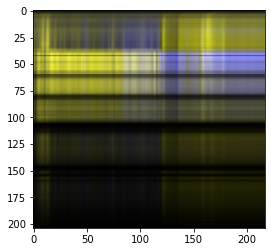

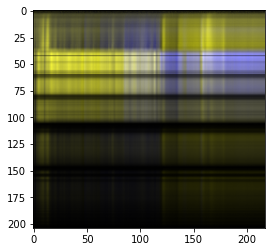

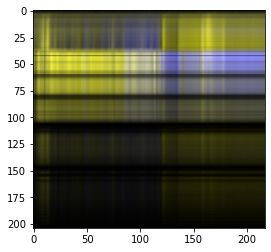

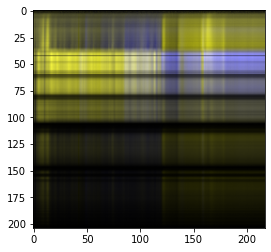

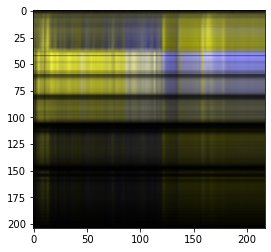

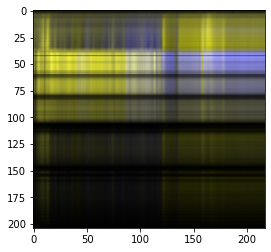

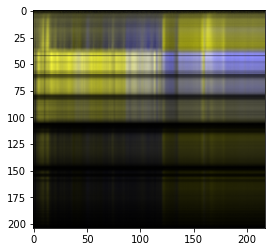

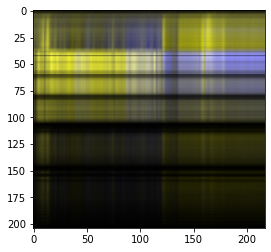

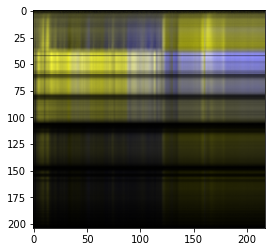

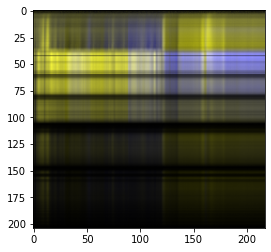

In [55]:
for i in range(10):
    view = sp.imshow(sal_pines, (145, 145, i))
    print(view)

In [56]:
ground_truth.shape

(217, 512)

In [57]:
print(ground_truth)

[[ 0  0  0 ... 16 16  0]
 [ 0  0  0 ... 16 16  0]
 [ 0  0  0 ... 16 16  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


#### using "matplotlib"

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


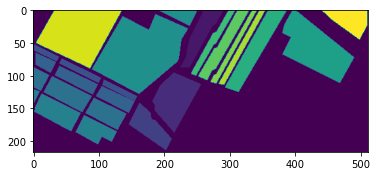

In [58]:
import matplotlib.pyplot as plt
plt.imshow(ground_truth)
print(np.unique(ground_truth)) 

#### Reshaped the dataset arrays and stored in variables

In [61]:
flattened_image = np.reshape(sal_pines,(-1,sal_pines.shape[-1]))
flattened_ground = np.reshape(ground_truth,(-1,))

In [62]:
len(flattened_image)
len(flattened_ground)


111104

### 1. Principle Component Analysis (PCA)

In [63]:
''' Principal Component Analysis (PCA) is a statistical procedure that uses an orthogonal transformation which converts a set of 
correlated variables to a set of uncorrelated variables. PCA is a most widely used tool in exploratory data analysis and in 
machine learning for predictive models. '''
# https://media.geeksforgeeks.org/wp-content/uploads/m.png

' Principal Component Analysis (PCA) is a statistical procedure that uses an orthogonal transformation which converts a set of \ncorrelated variables to a set of uncorrelated variables. PCA is a most widely used tool in exploratory data analysis and in \nmachine learning for predictive models. '

In [64]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [65]:
pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=10))])
pca_image = pipeline.fit_transform(flattened_image)

### 2. Linear Discriminant Analysis (LDA)

In [66]:
''' Linear discriminant analysis (LDA) is used here to reduce the number of features to a more manageable number before the
process of classification. The linear combinations obtained using Fisher's linear discriminant are called Fisher faces. '''
# https://media.geeksforgeeks.org/wp-content/uploads/20190423132455/ldanewaxis.jpg

" Linear discriminant analysis (LDA) is used here to reduce the number of features to a more manageable number before the\nprocess of classification. The linear combinations obtained using Fisher's linear discriminant are called Fisher faces. "

In [67]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [85]:
'''lda_pipeline = Pipeline([('scaling', StandardScaler()), ('lda', LinearDiscriminantAnalysis(n_components=10))])
lda_image = lda_pipeline.fit_transform(flattened_image,flattened_ground)'''

"lda_pipeline = Pipeline([('scaling', StandardScaler()), ('lda', LinearDiscriminantAnalysis(n_components=10))])\nlda_image = lda_pipeline.fit_transform(flattened_image,flattened_ground)"

### 3. Independent Component Analysis (ICA) 

In [69]:
''' Independent Component Analysis (ICA) is a machine learning technique to separate independent sources from a mixed signal.
Unlike principal component analysis which focuses on maximizing the variance of the data points, the independent component 
analysis focuses on independence, i.e. independent components '''
# https://media.geeksforgeeks.org/wp-content/uploads/20190521012201/ica.jpg

' Independent Component Analysis (ICA) is a machine learning technique to separate independent sources from a mixed signal.\nUnlike principal component analysis which focuses on maximizing the variance of the data points, the independent component \nanalysis focuses on independence, i.e. independent components '

In [70]:
from sklearn.decomposition import FastICA

In [71]:
ica_pipeline = Pipeline([('scaling', StandardScaler()), ('ica', FastICA(n_components=10))])
ica_image = ica_pipeline.fit_transform(flattened_image,flattened_ground)

In [72]:
norm_flattened = StandardScaler().fit_transform(flattened_image)

In [82]:
def flatten(X):
    if len(X.shape) <= 2:
        X = X
    else:
        X = np.reshape(X,(-1,X.shape[-1]))
    return X

In [83]:
def standard(X):
    from sklearn.preprocessing import StandardScaler
    return StandardScaler().fit_transform(flatten(X))

In [84]:
def unflatten(X,size=145):
    return np.reshape(X,(size,-1,X.shape[-1]))


In [76]:
class VarianceScorer:
    def __init__(self,X_perfect):
        self._original_variance = np.var(standard(X_perfect),axis = 0)
        self._original = flatten(X_perfect)
    
    def score(self,X):
        current_variance = np.var(flatten(X),axis = 0)
        return (sum(current_variance) / sum(self._original_variance))

In [77]:
def neighbour_score(X,mode="prepend"):
    d1 = np.linalg.norm(np.diff(X,axis = 0,prepend = 0),axis = -1)
    d2 = np.linalg.norm(np.flip(np.diff(np.flip(X,axis=0),axis = 0,prepend = 0),axis=0),axis=-1)
    d3 = np.linalg.norm(np.diff(X,axis = 1,prepend = 0),axis=-1)
    d4 = np.linalg.norm(np.flip(np.diff(np.flip(X,axis=1),axis = 1,prepend = 0),axis=1),axis=-1)
    return np.dstack([d1,d2,d3,d4])

In [78]:
class NeighbourhoodScorer:
    def __init__(self,X_perfect):
        self._original_neighbourhood = self._neighbour_score(X_perfect)
        self._original = flatten(X_perfect)
        
    def _neighbour_score(self,X,mode="wrap"):
        if mode == "prepend":
            # Results in ~0.99699-0.99853 for num_components~50-75
            d1 = np.linalg.norm(np.diff(X,axis = 0,prepend = 0),axis = -1)
            d2 = np.linalg.norm(np.flip(np.diff(np.flip(X,axis=0),axis = 0,prepend = 0),axis=0),axis=-1)
            d3 = np.linalg.norm(np.diff(X,axis = 1,prepend = 0),axis=-1)
            d4 = np.linalg.norm(np.flip(np.diff(np.flip(X,axis=1),axis = 1,prepend = 0),axis=1),axis=-1)
        elif mode == "wrap":
            # Results in ~0.99695-0.99852 for num_component~50-75
            d1 = np.linalg.norm(X - np.roll(X,shift=1,axis=0),axis = -1)
            d2 = np.linalg.norm(X - np.roll(X,shift=-1,axis=0),axis = -1)
            d3 = np.linalg.norm(X - np.roll(X,shift=1,axis=1),axis = -1)
            d4 = np.linalg.norm(X - np.roll(X,shift=-1,axis=1),axis = -1)
        return np.dstack([d1,d2,d3,d4])
    
    def score(self,X):
        current_mat = self._neighbour_score(X)
        return 1/(1+np.linalg.norm(current_mat - self._original_neighbourhood)/(current_mat.shape[0]*current_mat.shape[1]))
    
    def score1(self,X):
        current_mat = self._neighbour_score(X)
        scale = np.mean(current_mat,axis=(0,1)) / np.mean(self._original_neighbourhood,axis=(0,1))
        bias = np.mean(self._original_neighbourhood - (current_mat/scale))
        return 1/(1+np.linalg.norm((current_mat/scale) + bias - self._original_neighbourhood)/(current_mat.shape[0]*current_mat.shape[1]))

### Performance

In [79]:
Scorer = VarianceScorer(indian_pines)
pca_vs=Scorer.score(pca_image)
pca_vs

0.9592086027112744

In [80]:
Scorer = VarianceScorer(indian_pines)
lda_vs=Scorer.score(lda_image)
lda_vs

NameError: name 'lda_image' is not defined

In [86]:
Scorer = VarianceScorer(indian_pines)
ica_vs=Scorer.score(ica_image)
ica_vs

4.4120470768952556e-07

### Time consumption  

In [33]:
%timeit Scorer.score(lda_image)

NameError: name 'lda_image' is not defined

In [87]:
%timeit Scorer.score(pca_image)

4.72 ms ± 143 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [88]:
%timeit Scorer.score(ica_image)

3.2 ms ± 84 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Performance After Error Rate reduction

In [98]:
Scorer1 = NeighbourhoodScorer(unflatten(standard(sal_pines),204))
pca_ns=Scorer1.score1(unflatten(pca_image,204))
pca_ns

0.9752626099148319

In [94]:
Scorer1 = NeighbourhoodScorer(unflatten(standard(indian_pines),204))
lda_ns=Scorer1.score1(unflatten(lda_image,204))
lda_ns

NameError: name 'lda_image' is not defined

In [99]:
Scorer1 = NeighbourhoodScorer(unflatten(standard(indian_pines),204))
ica_ns=Scorer1.score1(unflatten(ica_image,204))
ica_ns

0.9810531000942607

### Time consumption  After Error Rate reduction

In [100]:
%timeit Scorer1.score1(unflatten(pca_image,204))

34.6 ms ± 1.65 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [101]:
%timeit Scorer1.score1(unflatten(lda_image,204))

NameError: name 'lda_image' is not defined

In [102]:
%timeit Scorer1.score1(unflatten(ica_image,204))

30.4 ms ± 1.42 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


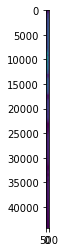

In [103]:
plt.imshow(flattened_image)

#### variance

In [104]:
#variance scores 
print("PCA Variance Score:",pca_vs*100)
#print("LDA Variance Score:",lda_vs*100)
print("ICA Variance Score:",ica_vs*100)



PCA Variance Score: 95.92086027112744
ICA Variance Score: 4.412047076895256e-05


#### Neighbour hood

In [105]:
#Neighbour hood scores
print("PCA NeighbourHood Score:",pca_ns*100)
#print("LDA NeighbourHood Score:",lda_ns*100)
print("ICA NeighbourHood Score:",ica_ns*100)



PCA NeighbourHood Score: 97.5262609914832
ICA NeighbourHood Score: 98.10531000942608


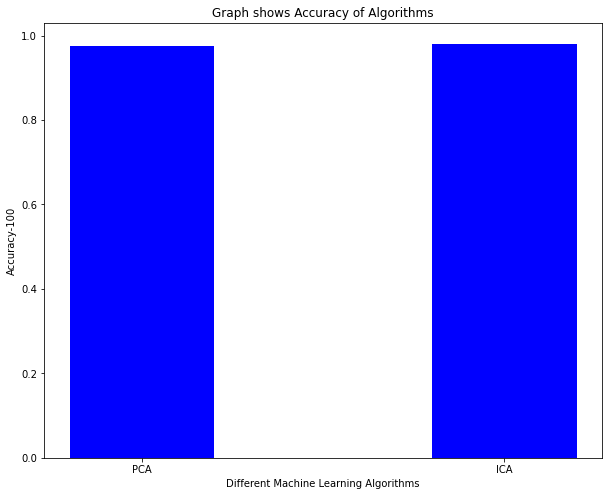

In [107]:
#NeighbourHood Scores are much better than Variance Scores

# creating the dataset
data = {'PCA':pca_ns,  'ICA':ica_ns}

courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 8))

# creating the bar plot
plt.bar(courses, values, color ='blue',width = 0.4)

plt.xlabel("Different Machine Learning Algorithms")
plt.ylabel("Accuracy-100")
plt.title("Graph shows Accuracy of Algorithms")
plt.show()


In [ ]:
# From Above graph we came conclude that 
#  PCA is efficient on Indian Pines Dataset